In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [3]:
chipotle_csv=pd.read_csv(url,sep='\t')

In [4]:
chipotle_csv.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
print('Data types in the dataset :\n',chipotle_csv.dtypes)
print('\nShape of dataset: ',chipotle_csv.shape)
print('\nNulls in dataset: \n',chipotle_csv.isna().sum())

Data types in the dataset :
 order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Shape of dataset:  (4622, 5)

Nulls in dataset: 
 order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [6]:
dollar=lambda x:float(x[1:])
chipotle_csv['item_price']=chipotle_csv['item_price'].apply(dollar)


In [7]:
categorical=lambda x:pd.Categorical(x)
chipotle_csv.apply(categorical)
#chipotle_csv.drop_duplicates(['item_name','quantity'])

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [8]:
chipotle_csv=chipotle_csv.fillna(value='[Not applicable]')

In [9]:
chipotle_csv.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [10]:
### Top 10 items by total sales
### Top 10 items by quantity

In [11]:
#chipotle_csv.groupby(['item_name']).sum().sort_values(['quantity'],ascending=False).head(3)
total_sales=chipotle_csv.groupby(['item_name'])['item_price'].sum().sort_values(ascending=False).head(10)
quantity=chipotle_csv.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).head(10)
print(total_sales)
print('\n')
print(quantity)

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price, dtype: float64


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64


In [12]:
### Vis

Text(0.5, 1.0, 'Item wise total quantity')

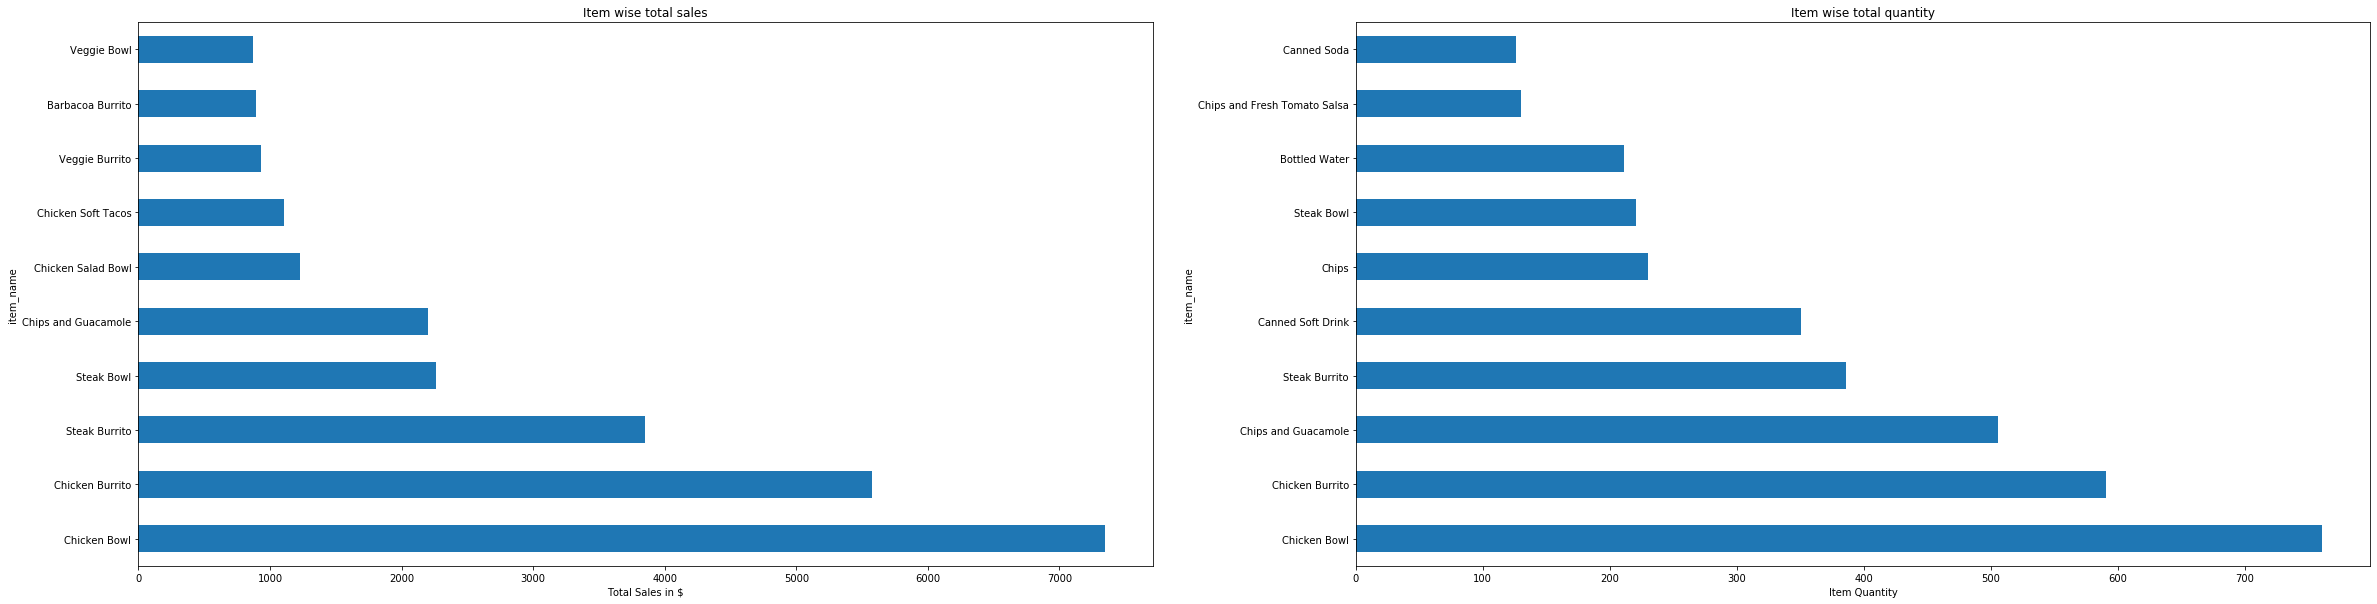

In [13]:
fig,(axs1,axs2)=plt.subplots(1,2,figsize=(40,10))
total_sales.plot(kind='barh',ax=axs1)
axs1.set_xlabel('Total Sales in $')
axs1.set_title('Item wise total sales')

quantity.plot(kind='barh',ax=axs2)
axs2.set_xlabel('Item Quantity')
axs2.set_title('Item wise total quantity')

In [14]:
#top 10 item customization of customer

In [15]:
chipotle_csv.groupby(['choice_description'])['quantity','item_price'].sum().sort_values(['quantity'],ascending=False).head(10)

,quantity,item_price
choice_description,,
[Not applicable],1382,4077.94
[Diet Coke],159,326.71
[Coke],143,288.79
[Sprite],89,133.93
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49,432.25
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42,372.64
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",40,455.50
[Lemonade],36,55.48
"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]",36,311.64


In [16]:
#Top 10 most ordered item

In [17]:
topitem=chipotle_csv.groupby(['item_name'])['item_name'].count().sort_values(ascending=False).head(10)
print(topitem)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [ ]:
#top 10 expensive items

In [85]:
chipotle_csv.sort_values(by='item_price',ascending=False).iloc[:,2:5].head(10)

,item_name,choice_description,item_price
3598,Chips and Fresh Tomato Salsa,[Not applicable],44.25
3480,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
409,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
1255,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",27.75
3603,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3636,Chicken Burrito,"[Fresh Tomato Salsa, Rice]",26.25
3634,Chicken Burrito,[Fresh Tomato Salsa],26.25


In [18]:
#Top 10 ordered item price range

In [19]:
def price_range():
    for item in topitem.index:
        max_price=chipotle_csv[chipotle_csv['item_name']==item].max()[4]
        min_price=chipotle_csv[chipotle_csv['item_name']==item].min()[4]
        print("{} has min price :${} and max price :${}".format(item,min_price,max_price))

price_range()

Chicken Bowl has min price :$8.19 and max price :$32.94
Chicken Burrito has min price :$8.19 and max price :$35.0
Chips and Guacamole has min price :$3.89 and max price :$17.8
Steak Burrito has min price :$8.69 and max price :$27.75
Canned Soft Drink has min price :$1.25 and max price :$5.0
Steak Bowl has min price :$8.69 and max price :$26.07
Chips has min price :$1.99 and max price :$6.45
Bottled Water has min price :$1.09 and max price :$15.0
Chicken Soft Tacos has min price :$8.49 and max price :$21.96
Chicken Salad Bowl has min price :$8.75 and max price :$22.5


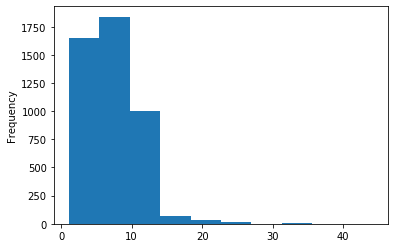

In [20]:
chipotle_csv['item_price'].plot(kind='hist')